In [ ]:
import cv2
import json
import os
import itertools

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

from google.colab import files

Mounted at /content/gdrive


In [ ]:
file_path = '/content/gdrive/MyDrive/Colab Notebooks/cats_dogs_images/_annotations.json'
with open(file_path, 'r') as file:
    data = json.load(file)

data

{'version': '1.0',
 'type': 'classification',
 'labels': ['dog', 'cat'],
 'annotations': {'645c2283-a71c-42ee-a841-3a696018eef8.jpg': [{'label': 'dog'}],
  'e95d9b59-1dd8-4747-abb9-bde400b7d25e.jpg': [{'label': 'dog'}],
  'e9d94988-099a-48e9-b6ad-bd939d0b92c0.jpg': [{'label': 'dog'}],
  '1710540b-b4dd-4697-bb7a-8e423fb05b1c.jpg': [{'label': 'dog'}],
  '4dc102a8-4d32-4870-9793-7d1199e33c97.jpg': [{'label': 'dog'}],
  '7f0b77ee-7b86-429f-80af-1cd9d809b10f.jpg': [{'label': 'dog'}],
  '318db1dd-ecb8-4e41-a513-44a1c53f4beb.jpg': [{'label': 'dog'}],
  '520a78bd-0b06-4ebc-95d3-cdbf67ef4cda.jpg': [{'label': 'dog'}],
  '46a4285c-e03a-49ff-bb8b-ce43c296cefa.jpg': [{'label': 'dog'}],
  '5ae0c1ae-fbc1-4814-8a88-4ed5d340af33.jpg': [{'label': 'dog'}],
  'ac7d3d12-37e4-4b2e-b09b-2d30ae02a716.jpg': [{'label': 'dog'}],
  '0c72b627-91aa-4848-b6a2-79c77bc81874.jpg': [{'label': 'dog'}],
  '445ffcf7-e8d5-4557-9e3c-a2b02caea58b.jpg': [{'label': 'dog'}],
  'b5377ba6-745e-4d42-80d8-08cc71b94325.jpg': [{'label

In [ ]:
train_labels = []   # 0 is dog, 1 is cat
train_images = []    # np.array

for key, value in data["annotations"].items():
    if value[0]["label"] == "dog":
        train_labels.append(0)
    else:
        train_labels.append(1)

    path = os.path.join("/content/gdrive/MyDrive/Colab Notebooks/cats_dogs_images/", key)
    if os.path.exists(path):
      img = cv2.resize(cv2.imread(path), (216, 216))
      train_images.append(img)

train_labels = np.array(train_labels)
train_images = np.array(train_images).astype("float32")

In [ ]:
for i, (key, value) in enumerate(dict(itertools.islice(data["annotations"].items(), 3, 7)).items()):
  print(key)

1710540b-b4dd-4697-bb7a-8e423fb05b1c.jpg
4dc102a8-4d32-4870-9793-7d1199e33c97.jpg
7f0b77ee-7b86-429f-80af-1cd9d809b10f.jpg
318db1dd-ecb8-4e41-a513-44a1c53f4beb.jpg


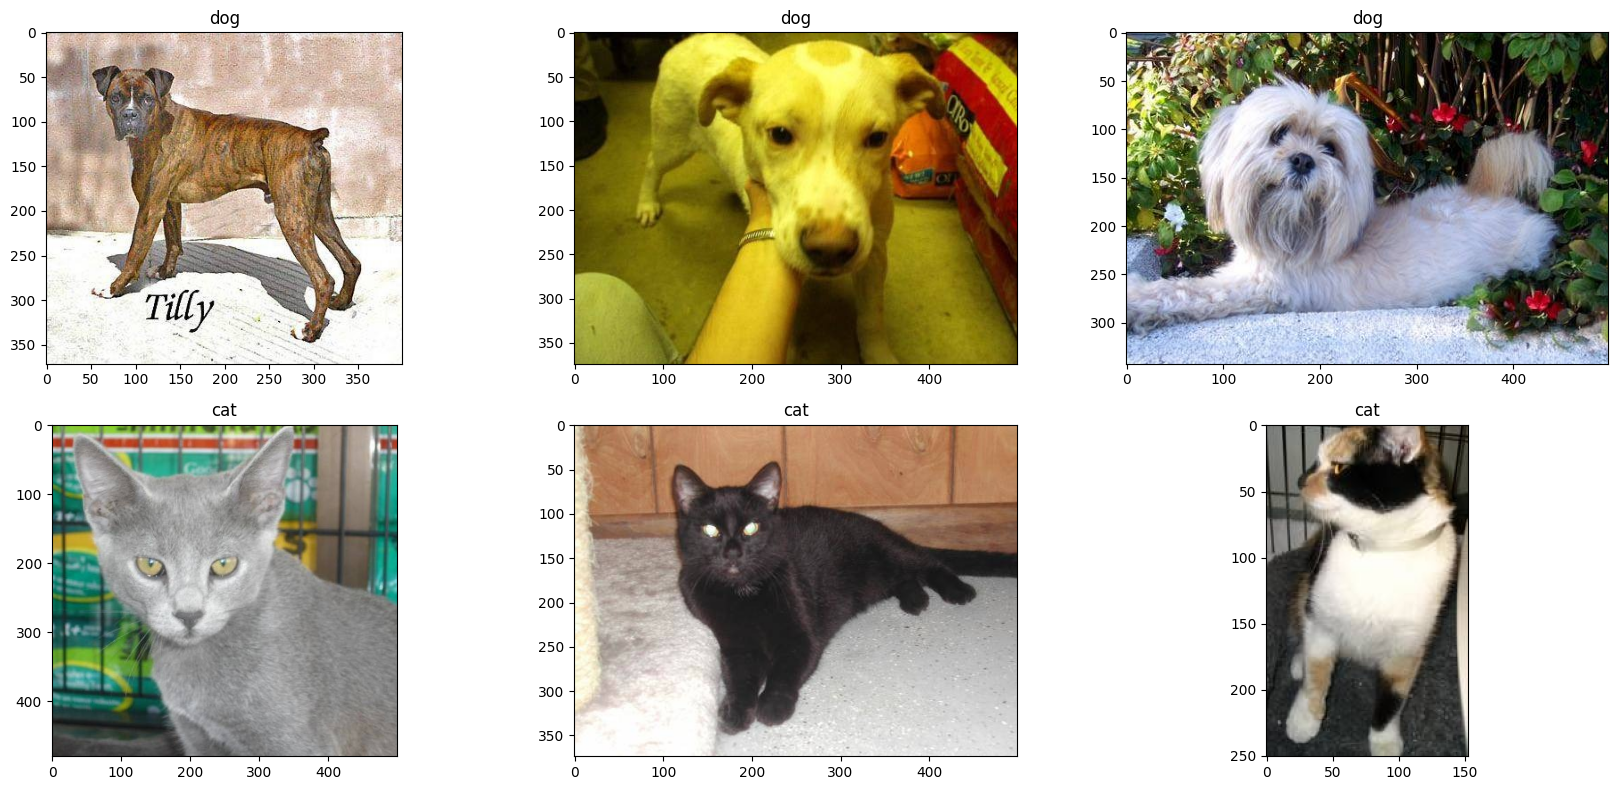

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(17, 8))

for i, (key, value) in enumerate(dict(itertools.islice(data["annotations"].items(), 3)).items()):
  path = os.path.join("/content/gdrive/MyDrive/Colab Notebooks/cats_dogs_images/", key)
  if os.path.exists(path):
    axes[0, i].imshow(cv2.cvtColor(cv2.imread(path).astype(np.uint8), cv2.COLOR_BGR2RGB))
    axes[0, i].set_title(value[0]["label"])

for i, (key, value) in enumerate(dict(itertools.islice(data["annotations"].items(), 100, 103)).items()):
  path = os.path.join("/content/gdrive/MyDrive/Colab Notebooks/cats_dogs_images/", key)
  if os.path.exists(path):
    axes[1, i].imshow(cv2.cvtColor(cv2.imread(path).astype(np.uint8), cv2.COLOR_BGR2RGB))
    axes[1, i].set_title(value[0]["label"])


plt.tight_layout()
plt.show()

In [ ]:
X = train_images
y = train_labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.reshape(-1, 216 * 216 * 3)
X_test = X_test.reshape(-1, 216*216*3)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

k_values = [1, 2, 3, 4, 5]

for k in k_values:
    knn = cv2.ml.KNearest_create()
    knn.train(X_train, cv2.ml.ROW_SAMPLE, y_train)
    ret, results, neighbours, dist = knn.findNearest(X_test, k=k)


In [ ]:
knn.save('/content/gdrive/MyDrive/Colab Notebooks/cats_dogs_images/knn_model.xml')

In [ ]:
# uploaded = files.upload()

# knn = cv2.ml.KNearest_load('/content/gdrive/MyDrive/Colab Notebooks/cats_dogs_images/knn_model.xml')

# def predict_image(image_path):
#     path = os.path.join("/content/gdrive/MyDrive/Colab Notebooks/cats_dogs_images/", image_path)
#     img = cv2.resize(cv2.imread(path), (216, 216)).astype(np.float32)
#     img = img.reshape(1, -1)
#     ret, results, neighbours, dist = knn.findNearest(img, k=3)
#     return int(results[0][0])

# image_path = 'df15d89e-185d-40ff-b663-68b15f9a8337.jpg'
# label = predict_image(image_path)
# print(f'Predicted label: {label}')

In [ ]:
knn = cv2.ml.KNearest_load('/content/gdrive/MyDrive/Colab Notebooks/cats_dogs_images/knn_model.xml')

path = os.path.join("/content/gdrive/MyDrive/Colab Notebooks/cats_dogs_images/", "e80a6b08-4e36-4eb8-ab99-f0c2b47b631b.jpg")
if os.path.exists(path):
  image = cv2.imread(path)
  pixel_image = cv2.resize(image, (216, 216)).astype("float32")

  ret, results, neighbours, dist = knn.findNearest(pixel_image.reshape(1, -1), k=3)
  print(f'This image is: {"dog" if int(results[0][0]) == 0 else "cat"}')

This image is: dog


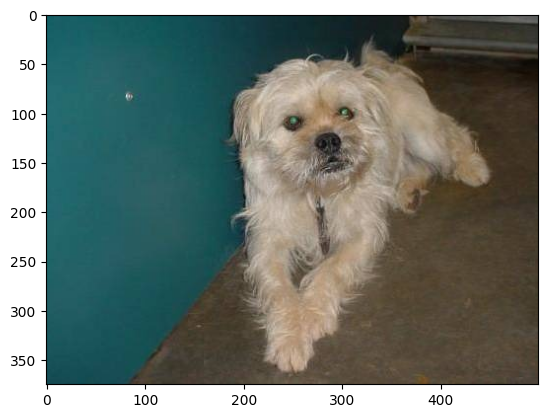

In [ ]:
path = os.path.join("/content/gdrive/MyDrive/Colab Notebooks/cats_dogs_images/", "e80a6b08-4e36-4eb8-ab99-f0c2b47b631b.jpg")
if os.path.exists(path):
  plt.imshow(cv2.cvtColor(cv2.imread(path).astype(np.uint8), cv2.COLOR_BGR2RGB))
  plt.show()